<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day1_Introduction_to_DL_framework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)

(60000, 28, 28)


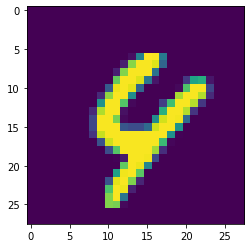

In [4]:
import numpy as np
rnd_int = np.random.randint(X_train.shape[0], size=1)[0]
from matplotlib import pyplot as plt
plt.imshow(X_train[rnd_int])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
print(X_train.shape)

(60000, 28, 28, 1)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Convolution2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
None


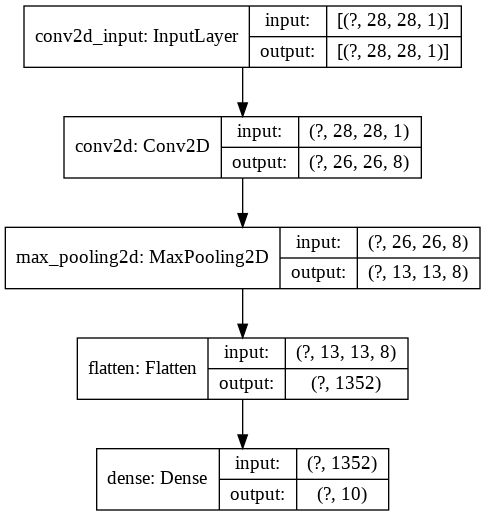

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='my_model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [13]:
history = model.fit(
    X_train,
    Y_train,
    epochs=3,
    validation_data=(X_test, Y_test),
    batch_size=10, verbose=2
    )

Epoch 1/3
6000/6000 - 19s - loss: 0.2840 - accuracy: 0.9184 - val_loss: 0.1544 - val_accuracy: 0.9555
Epoch 2/3
6000/6000 - 18s - loss: 0.1290 - accuracy: 0.9633 - val_loss: 0.1019 - val_accuracy: 0.9681
Epoch 3/3
6000/6000 - 18s - loss: 0.0930 - accuracy: 0.9724 - val_loss: 0.0937 - val_accuracy: 0.9692


In [14]:
model.save_weights('my_mnist_cnn.h5')

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('my_mnist_cnn.h5')

In [18]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(Y_test[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [19]:
import matplotlib.pyplot as plt
import numpy as np

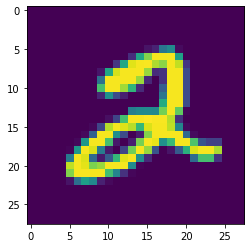

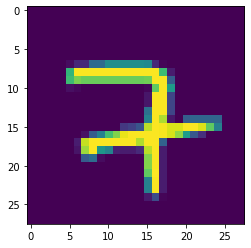

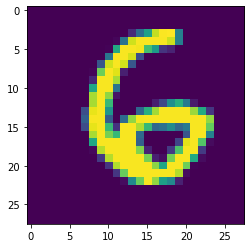

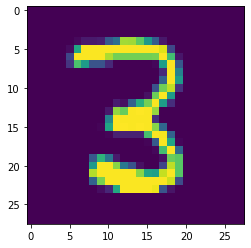

In [23]:
# A few random samples
use_samples = [5, 38, 3939, 27389]
samples_to_predict = []
img_width, img_height = 28, 28

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((img_width, img_height))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])

In [24]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(4, 28, 28, 1)


In [25]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

[[3.4123541e-06 1.5957150e-08 9.9982733e-01 1.3113496e-06 7.7736991e-07
  1.2508112e-07 1.1674679e-08 1.9814427e-06 1.0689255e-04 5.8194004e-05]
 [5.2690737e-08 2.4174691e-09 1.6440744e-02 3.2215964e-04 4.3541327e-06
  1.4570726e-08 6.8042860e-10 9.8322886e-01 3.0216106e-06 8.2997354e-07]
 [7.3623374e-07 2.1112255e-08 4.0409650e-06 9.2326955e-09 4.0500736e-06
  3.1814980e-05 9.9990106e-01 1.4480940e-09 5.8178659e-05 8.6031974e-08]
 [4.2341203e-08 7.8978353e-08 3.4698423e-03 9.9389946e-01 2.0243411e-10
  1.2736489e-05 1.0531732e-06 2.4494181e-08 2.6163519e-03 3.1592816e-07]]


In [26]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[2 7 6 3]
